In [5]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

In [6]:
# Load results
results = pd.read_csv("../results/metrics_summary.csv")
print(results)

                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.970760   0.990385  0.962617  0.976303
1        Decision Tree  0.947368   0.980392  0.934579  0.956938
2                  KNN  0.953216   0.938053  0.990654  0.963636


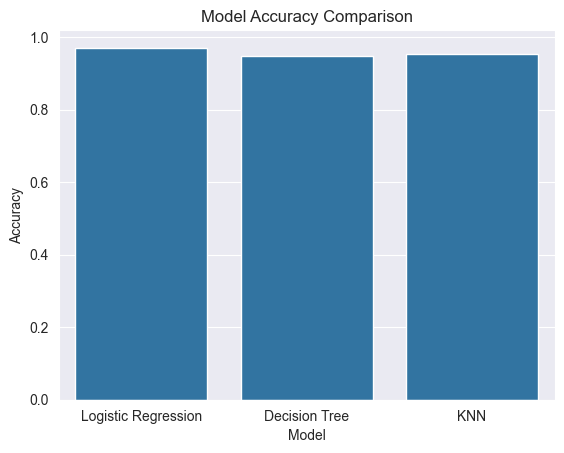

In [7]:
# Plot comparison
sns.barplot(data=results, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [8]:
# Example confusion matrix for Logistic Regression
model = joblib.load("../models/logistic_regression.joblib")
df = pd.read_csv("../data/data_diagnosis.csv")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_test_pca = pca.fit_transform(X_test_scaled)

y_pred = model.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

ValueError: X has 9 features, but LogisticRegression is expecting 10 features as input.